In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [ ]:
X_train, y_train = generate_data(n_train = 300, train_only = True,
n_features = 2)
outlier_fraction = 0.1

In [ ]:
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

In [ ]:
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)
xx, yy = np.meshgrid(np.linspace(-10, 10, 200),
np.linspace(-10, 10, 200))

/home/sl/.local/lib/python3.8/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

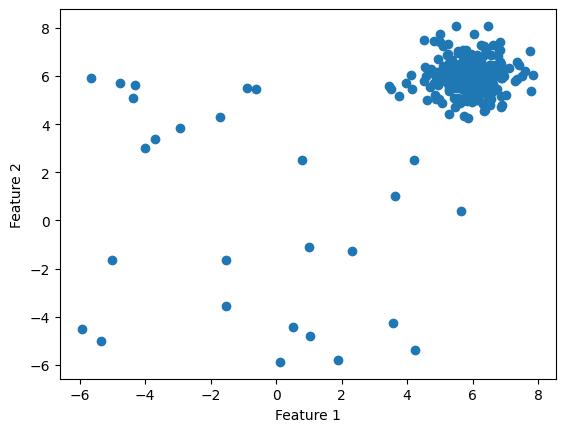

In [ ]:
plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train,y_train)

In [ ]:
scores_pred = clf.decision_function(X_train)*-1
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()

In [ ]:
print('The number of prediction errors are ' + str(n_errors))
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)

The number of prediction errors are 4


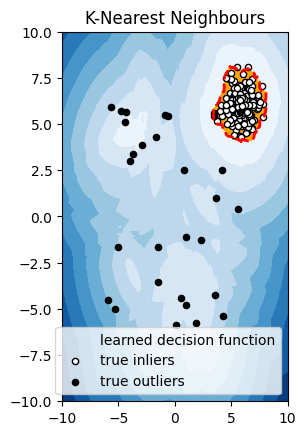

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),
threshold, 10), cmap = plt.cm.Blues_r)

a = subplot.contour(xx, yy, Z, levels =[threshold],
linewidths = 2, colors ='red')
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')


b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],
c ='white', s = 20, edgecolor ='k')


c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],
c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')
subplot.legend(
[a.collections[0], b, c],
['learned decision function', 'true inliers', 'true outliers'],
prop = matplotlib.font_manager.FontProperties(size = 10),
loc ='lower right')
subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()